**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**September, 2023**

---

# Notebook to perform the clustering analysis of the integrated All data


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata
import scvi


In [2]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/integrated/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
absl                NA
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiw

'/opt/conda/bin/python'

In [3]:
def doublet_assing(adata_obj, cell_id):
    
    '''
    Function that assigns the "doublet" label to the cells that were pooled
    
    input
        adata_obj: adata object
        cell_id: ID of a sinfle cell

    '''
    
    #is_doublet label of the current cell, it's a boolean value
    curr_isDoublet = adata_obj.obs.loc[cell_id, 'is_doublet']


    #If the is_doublet is True, then the function willl return the "doublet"
    # Otherwise it will return the "singlet". 
    if curr_isDoublet == True:
        return("doublet")
    
    else:
        return("singlet")

    

## Loading data

In [4]:
adata = sc.read('../results/scVI/snRNA2_scVIintegrated_AllDataRaw.h5ad')
adata.X.shape

(66209, 36601)

In [5]:
adata.X=adata.layers['raw_counts'].copy()

### Normalization

In [6]:
#Normalize and scale data to run neirest neighbors and plot gene expression
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
#sc.pp.scale(adata, max_value=10)

normalizing counts per cell
    finished (0:00:00)


### Plotting the different scVI latent spaces in UMAP embedation

In [7]:
#LATENT 30
sc.pp.neighbors(adata, n_neighbors=20, use_rep="X_scVI_n_latent_30")
sc.tl.umap(adata)

#clustering
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:37)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:44)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:14)


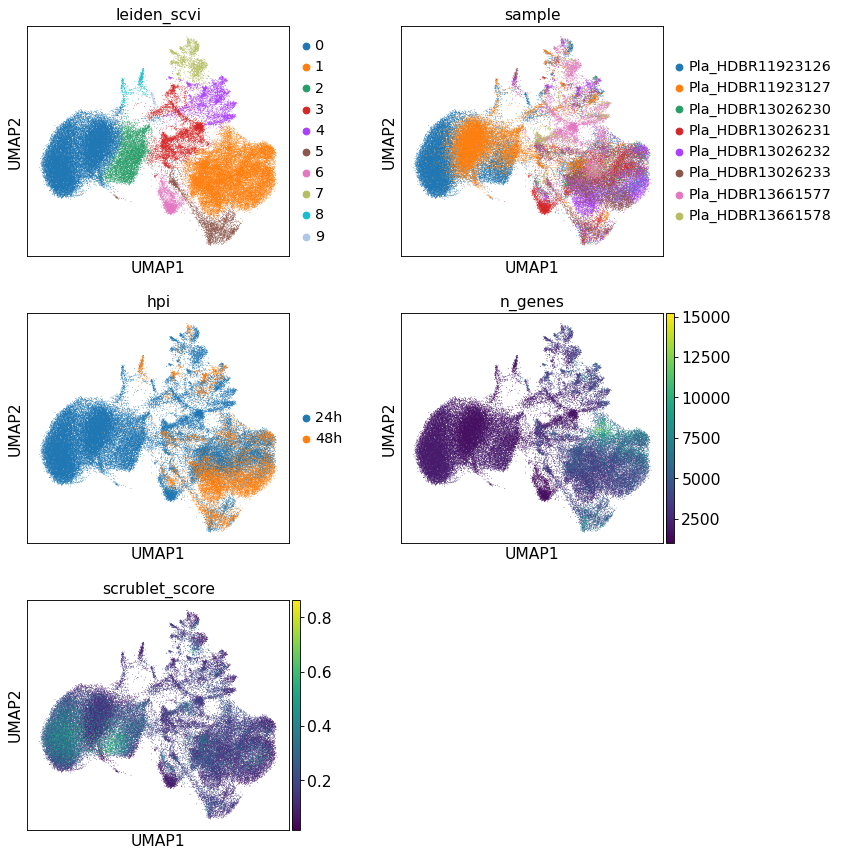

In [8]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=["leiden_scvi",'sample',#'donor_souporcell', 
                         'hpi','n_genes','scrublet_score']
           ,ncols=2,  wspace=0.3, save='_scVI_latent30Raw.pdf')

In [9]:
#LATENT 20
sc.pp.neighbors(adata, n_neighbors=20, use_rep="X_scVI_n_latent_20")
sc.tl.umap(adata)

#clustering
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:41)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:15)


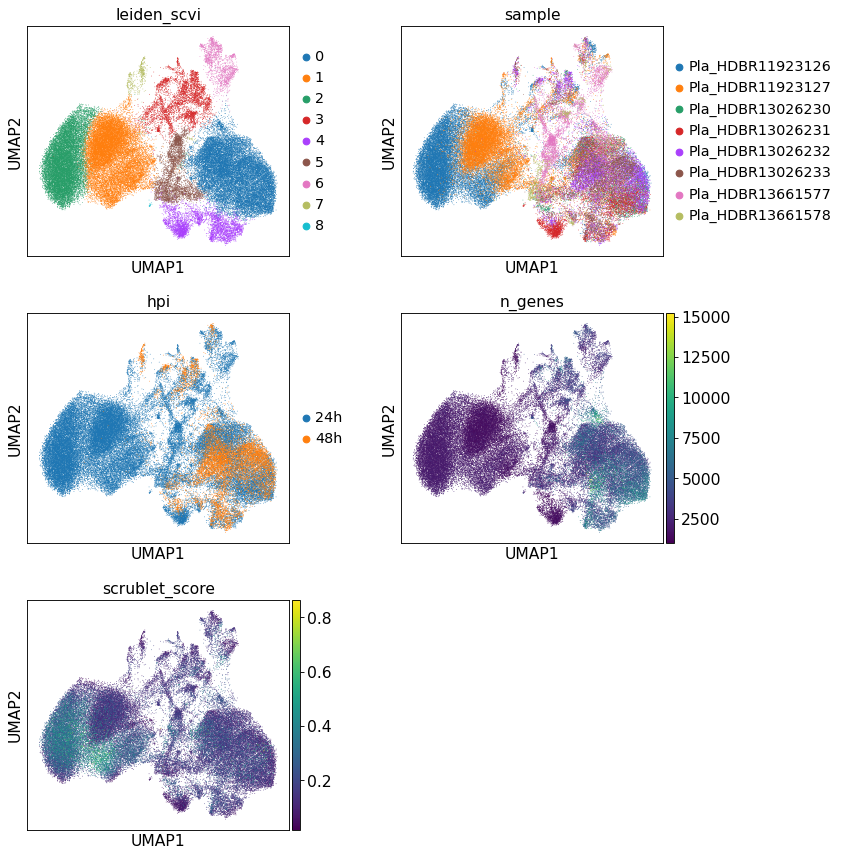

In [10]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=["leiden_scvi",'sample',#'donor_souporcell', 
                         'hpi','n_genes','scrublet_score' ],
           ncols=2,  wspace=0.3, save='_scVI_latent20Raw.pdf')

### Collapsing cell identities in the different samples

In [11]:
set(adata.obs['donor_id'])

{'donor_doublets',
 'snDonor_Pf0',
 'snDonor_Pf1',
 'snDonor_Pf2',
 'snDonor_Pf3',
 'snDonor_Pf5',
 'snDonor_Pf6'}

In [12]:
adata

AnnData object with n_obs × n_vars = 66209 × 36601
    obs: 'sample', 'stage', 'donor', 'hpi', 'infection', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'assignment_SoC', 'donor_deconv', 'donor_souporcell', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'infection_stage', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi'
    var: 'gene_ids', 'feature_types', 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi', 'donor_id_colors', 'hvg', 'infection_colors', 'sample_colors', 'log1p', 'neighbors', 'umap', 'leiden', 'leiden_scvi_colors', 'hpi_colors'
    obsm: 'X_scVI_n_latent_15', 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', '_scvi_extra_categoricals', 'X_umap'
    layers: 'raw_counts'
    obsp: 'distances', 'connectivities'

In [13]:
## Function to collapse different columns into the same one

#temp= adata.obs[['identity','identity_v2','identity_v3']]
#identity_collapsed= temp.ffill(1).iloc[:,-1].to_frame(name='identity_collapsed')
#adata.obs['identity_collapsed']=identity_collapsed

### Choosing a number of latent variants for the downstream analysis

Keeping latent= 20

In [14]:
sc.set_figure_params(figsize=(6,6))

### Saving the object with use_rep="X_scVI_n_latent_20"

In [19]:
adata.obs['is_doublet']= adata.obs['is_doublet'].astype('string')

In [15]:
annotation= pd.read_csv('../../data_integration/data/annotation_TrophoblastCelltype.csv', index_col=0)

In [20]:
annotation= annotation.rename(columns={"cell_type": "cell_typeAll", "stage_perInfection": "stage_perInfection"})
del(annotation['stage_perInfection'])

In [21]:
annotation

cell_typeAll
Pla_HDBR13038517_AAACCCAAGCCTGGAA          VCT
Pla_HDBR13038517_AAACGAATCACGAGGA          VCT
Pla_HDBR13038517_AAACGCTAGAAGGGAT          SCT
Pla_HDBR13038517_AAACGCTGTCTGTCCT          VCT
Pla_HDBR13038517_AAAGAACAGAGCATCG   VCT_fusing
...                                        ...
Pla_HDBR13798228_TTTGTTGCAAAGGCAC          VCT
Pla_HDBR13798228_TTTGTTGCACGGATCC          SCT
Pla_HDBR13798228_TTTGTTGCATTGTACG          VCT
Pla_HDBR13798228_TTTGTTGTCAGCGCAC        VCT_p
Pla_HDBR13798228_TTTGTTGTCCCGTAAA          VCT

[98603 rows x 1 columns]

In [23]:
adata.obs= adata.obs.join(annotation)

In [16]:
#adata.X=adata.layers['raw_counts'].copy()

In [17]:
#adata.write('../results/scVI/snRNA3_denoised_scVIintegrated_AllDataRaw.h5ad')

In [4]:
#adata= sc.read('../results/scVI/snRNA3_denoised_scVIintegrated_AllData.h5ad')

### Marker genes: plots

... storing 'is_doublet' as categorical
... storing 'cell_typeAll' as categorical


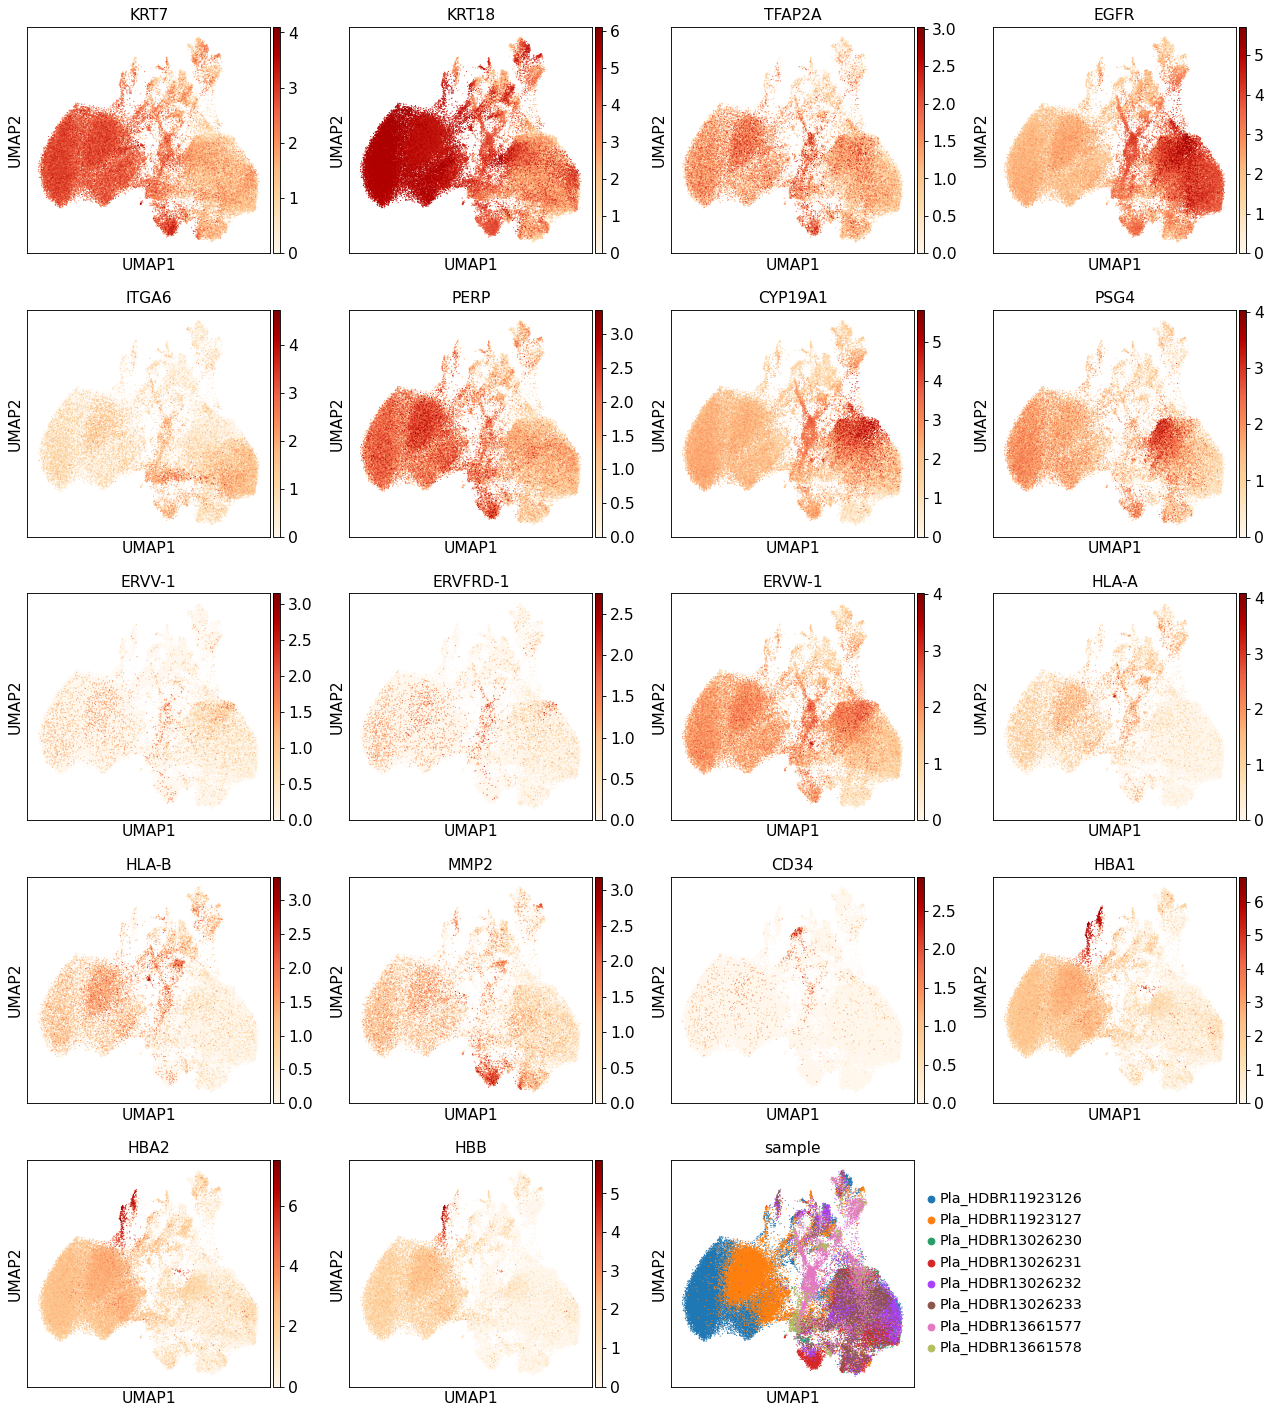

In [24]:
sc.pl.umap(adata, color=['KRT7','KRT18', 'TFAP2A', 'EGFR' ,'ITGA6','PERP', #Trophoblast
                         'CYP19A1','PSG4', #SCT
                         'ERVV-1', #VCT
                         'ERVFRD-1', 'ERVW-1', #SCT & VCT
                         'HLA-A','HLA-B', # NO trophoblast
                         'MMP2', #dS
                         'CD34', #Endo
                         'HBA1','HBA2','HBB', #Ery
                         'sample'], size=4, use_raw=False, color_map='OrRd', save='_otherMarkers_scVI_latent20Raw.pdf')

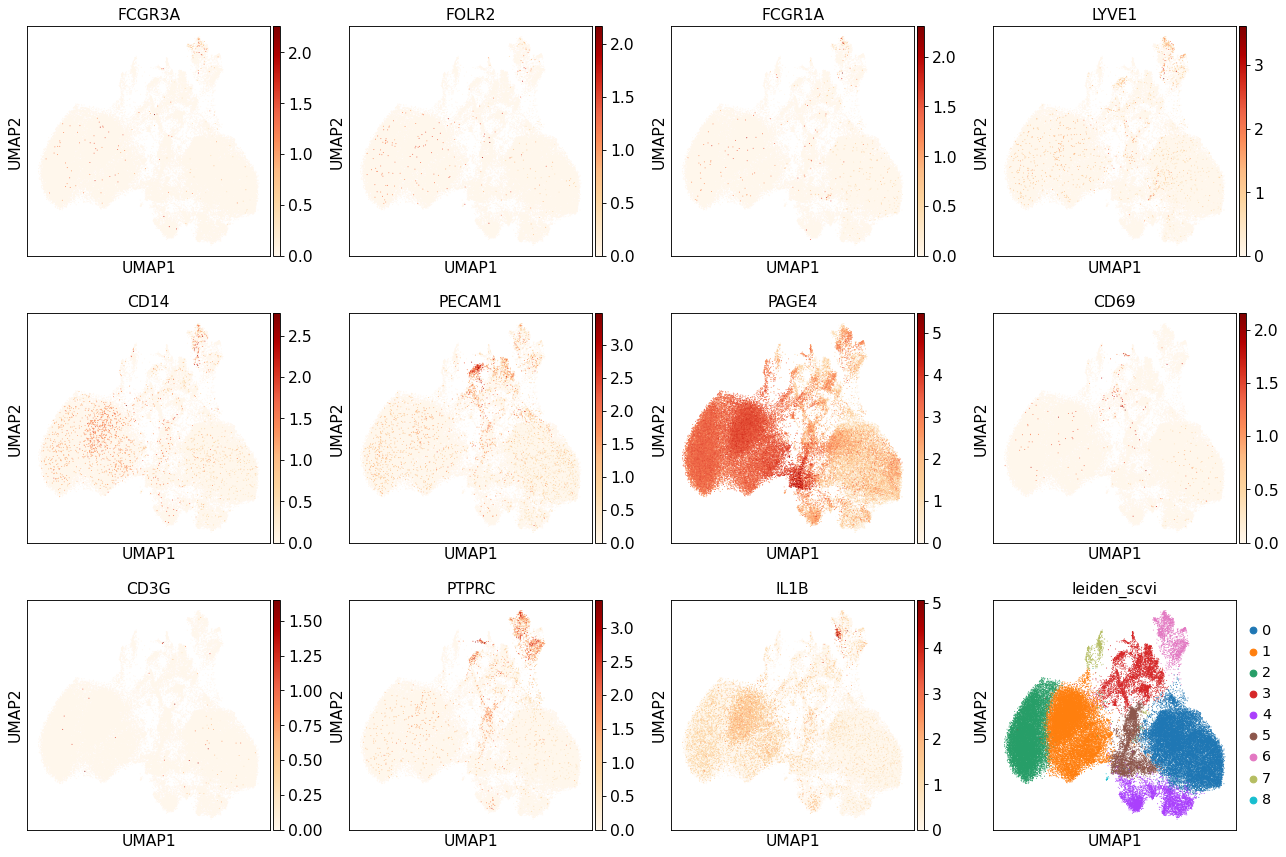

In [25]:
sc.pl.umap(adata, color=['FCGR3A', 'FOLR2', 'FCGR1A', 'LYVE1', 'CD14','PECAM1','PAGE4',
                         'CD69', 'CD3G','PTPRC','IL1B','leiden_scvi'],color_map='OrRd',use_raw=False,size=3,
           save='_placentaImmuneMarkers_scVI_latent20Raw.pdf')

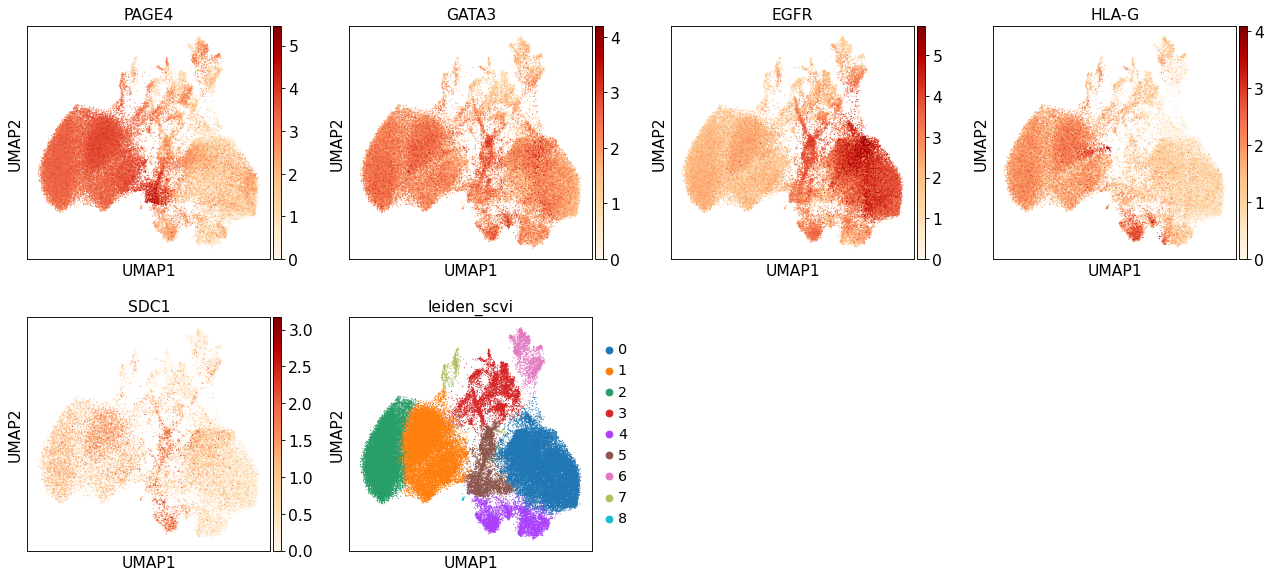

In [26]:
sc.pl.umap(adata, color=['PAGE4', 'GATA3', 'EGFR', 'HLA-G','SDC1','leiden_scvi']
           ,use_raw=False, size=4, color_map='OrRd', save='_trophoblastMarkers_scVI_latent20Raw.pdf')

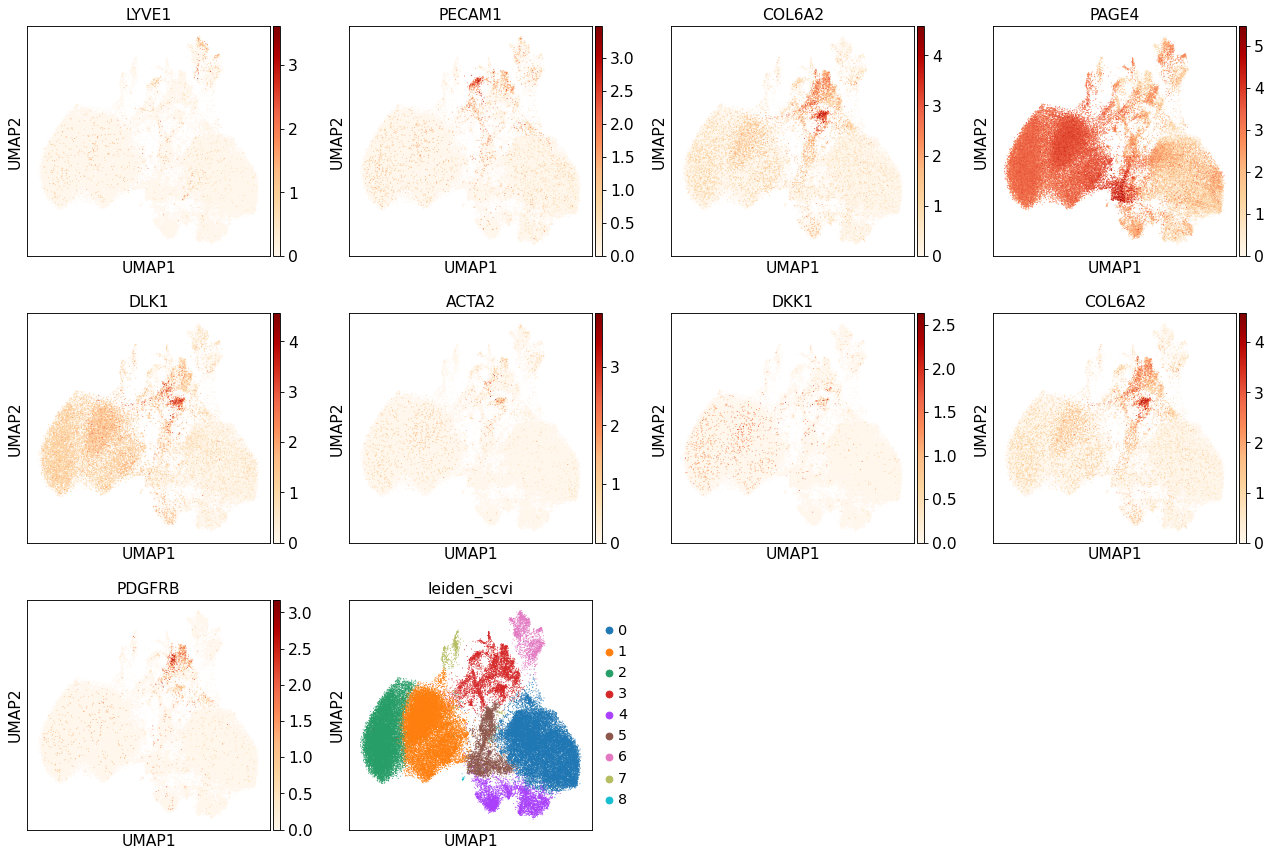

In [27]:
sc.pl.umap(adata, color=['LYVE1', 'PECAM1', 'COL6A2', 'PAGE4',
                        'DLK1', 'ACTA2','DKK1', 'COL6A2','PDGFRB', 'leiden_scvi'],color_map='OrRd',use_raw=False,size=3,
           save='_placentaMarkers_scVI_latent20Raw.pdf')

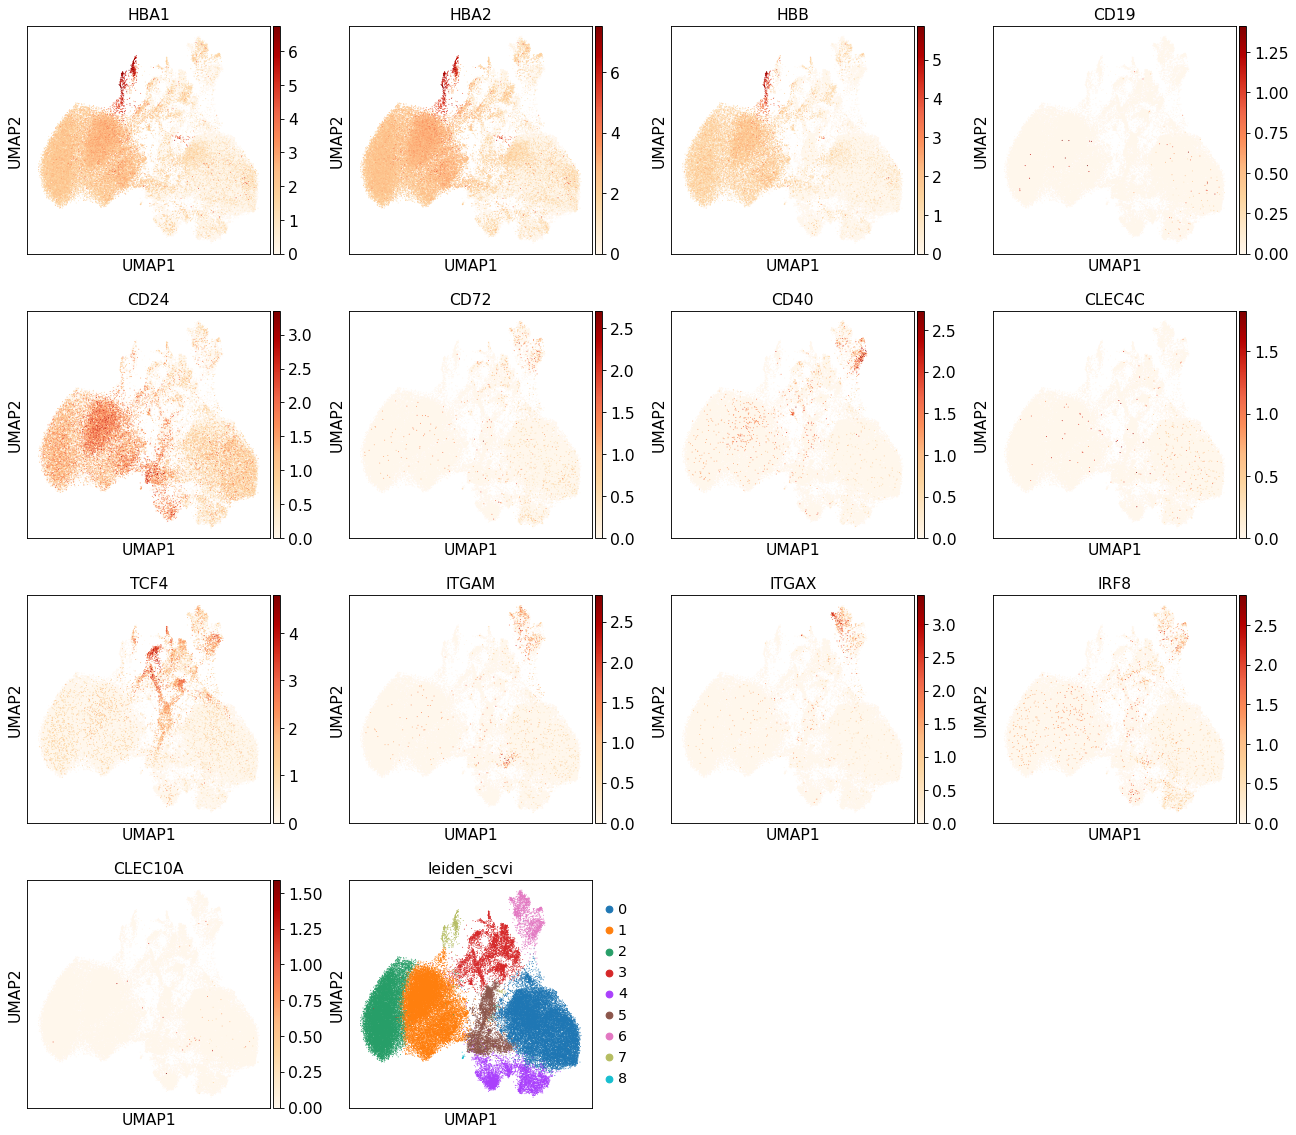

In [28]:
sc.pl.umap(adata, color=['HBA1','HBA2','HBB', #Erythrocyte
                         'CD19','CD24', 'CD72', #B cells
                         'CD40',#macrophage
                         'CLEC4C','TCF4','ITGAM','ITGAX','IRF8','CLEC10A', #DCs
                         'leiden_scvi'],use_raw=False, color_map='OrRd',size=3,)

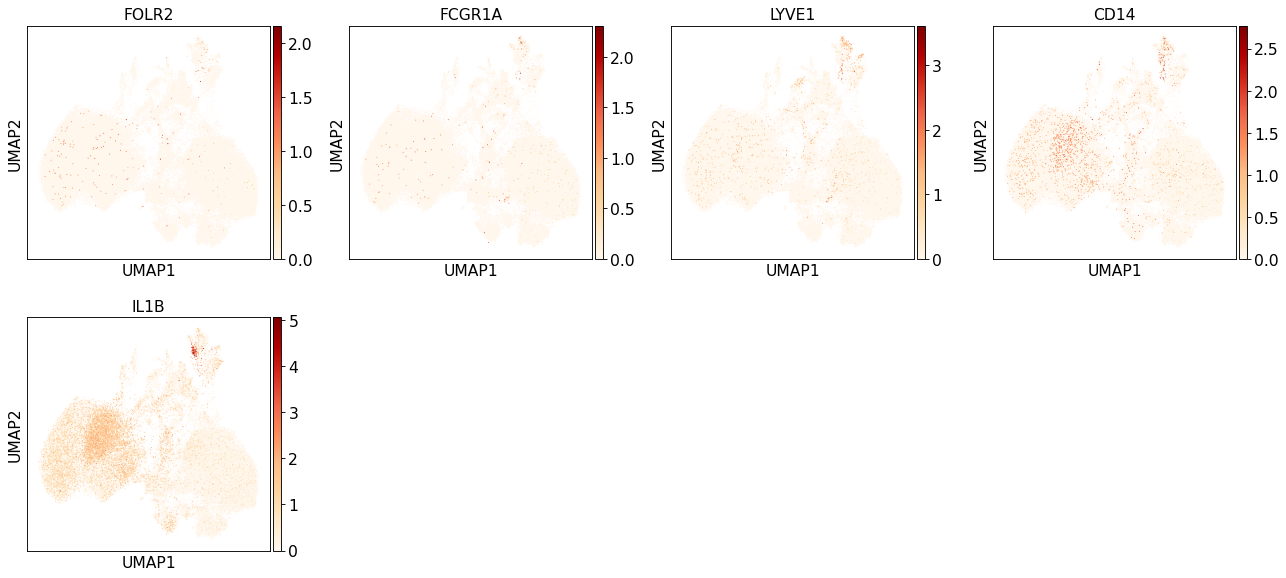

In [29]:
sc.pl.umap(adata, color=['FOLR2', 'FCGR1A', 'LYVE1', 'CD14','IL1B'],color_map='OrRd',use_raw=False,size=3,
           save='_HBMarkers_scVI_latent20Raw.pdf')

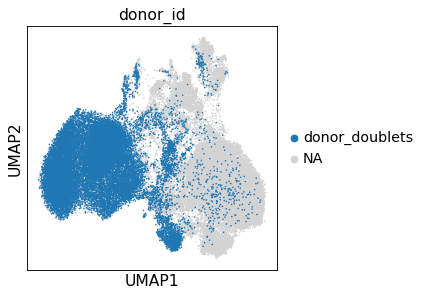

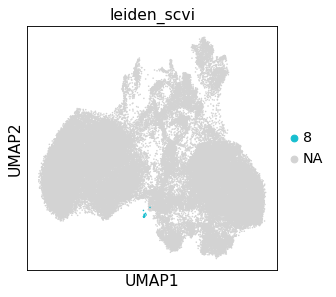

In [34]:
sc.pl.umap(adata, color="donor_id", groups= "donor_doublets", size=8)
sc.pl.umap(adata, color="leiden_scvi", groups= "8", size=8)

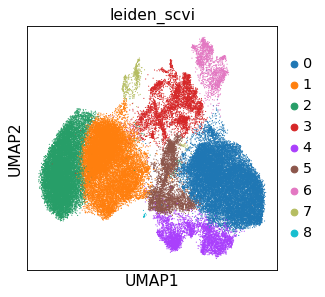

In [30]:

# use scVI imputed values for plotting
sc.pl.umap(adata, color=['leiden_scvi' ], size=4, save='_scVI_latent20_clustersRaw.pdf')

In [24]:
adata

AnnData object with n_obs × n_vars = 303877 × 36601
    obs: 'sample', 'stage', 'donor', 'hpi', 'infection', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'assignment_SoC', 'donor_deconv', 'donor_souporcell', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'infection_stage', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 'total_counts_tg', 'pct_counts_tg', 'Tg_infected', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi'
    var: 'gene_ids', 'feature_types', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi', 'donor_id_colors', 'hvg', 'infection_colors', 'sample_colors', 'log1p', 'neighbors', 'umap', 'leiden', 'leiden_scvi_colors', 'hpi_colors', 'Tg_infected_colors'
    obsm: 'X_scVI_n_latent_15', 'X_scVI_n_latent

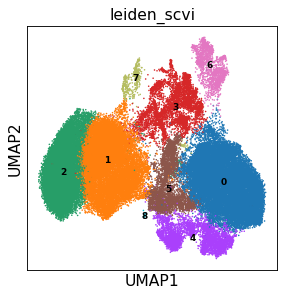

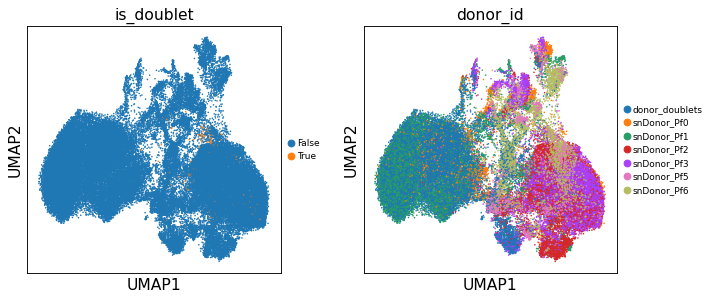

In [32]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['leiden_scvi' ], legend_loc='on data',legend_fontsize='xx-small', size=8 )
sc.pl.umap(adata, color=['is_doublet', 'donor_id' ], legend_fontsize='xx-small' , size=8)

In [26]:
adata

AnnData object with n_obs × n_vars = 303877 × 36601
    obs: 'sample', 'stage', 'donor', 'hpi', 'infection', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'assignment_SoC', 'donor_deconv', 'donor_souporcell', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'infection_stage', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 'total_counts_tg', 'pct_counts_tg', 'Tg_infected', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi'
    var: 'gene_ids', 'feature_types', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi', 'donor_id_colors', 'hvg', 'infection_colors', 'sample_colors', 'log1p', 'neighbors', 'umap', 'leiden', 'leiden_scvi_colors', 'hpi_colors', 'Tg_infected_colors', 'is_doublet_colors'
    obsm: 'X_scVI_n_latent_

### Adding stage_perInfection metadata

In [36]:
adata.obs['stage_perInfection']=adata.obs['stage'].astype('string')

In [37]:
adata.obs['stage_perInfection']

Pla_HDBR11923126_AAACCCAAGACCAACG    UI_24h
Pla_HDBR11923126_AAACCCAAGAGAGGGC    UI_24h
Pla_HDBR11923126_AAACCCAAGCGAACTG    UI_24h
Pla_HDBR11923126_AAACCCAAGGATTTGA    UI_24h
Pla_HDBR11923126_AAACCCAAGTACTGTC    UI_24h
                                      ...  
Pla_HDBR13661578_TTTCATGGTATGCTTG    Pf_24h
Pla_HDBR13661578_TTTCCTCAGTCCTGTA    Pf_24h
Pla_HDBR13661578_TTTGATCTCCAGCCTT    Pf_24h
Pla_HDBR13661578_TTTGGAGAGAGCATAT    Pf_24h
Pla_HDBR13661578_TTTGTTGGTTAAGTCC    Pf_24h
Name: stage_perInfection, Length: 66209, dtype: string

In [38]:
adata.obs.loc[adata.obs['sample']=='Pla_HDBR11923126', 'stage_perInfection']= 'UI_Pf_24h'
adata.obs.loc[adata.obs['sample']=='Pla_HDBR13026230', 'stage_perInfection']= 'UI_Pf_24h'
adata.obs.loc[adata.obs['sample']=='Pla_HDBR13026232', 'stage_perInfection']= 'UI_Pf_48h'
adata.obs.loc[adata.obs['sample']=='Pla_HDBR13661577', 'stage_perInfection']= 'UI_Pf_24h'




In [39]:
adata.obs['stage_perInfection']=adata.obs['stage_perInfection'].astype('category')

In [40]:
adata.obs['stage_perInfection'].values.describe()

counts     freqs
categories                  
Pf_24h       23893  0.360872
Pf_48h        4508  0.068087
UI_Pf_24h    31036  0.468758
UI_Pf_48h     6772  0.102282

In [41]:
adata.obs['donor_id'].values.describe()

counts     freqs
categories                      
donor_doublets   21841  0.329880
snDonor_Pf0       5567  0.084082
snDonor_Pf1      14911  0.225211
snDonor_Pf2       8476  0.128019
snDonor_Pf3      10308  0.155689
snDonor_Pf5       1177  0.017777
snDonor_Pf6       3929  0.059342

In [42]:
sc.set_figure_params(figsize=(5,5)) 

## Saving data

In [44]:
adata.X=adata.layers['raw_counts'].copy()

In [45]:
adata.write('../results/scVI/snRNA3_raw_scVIintegrated_AllData.h5ad')

In [4]:
adata= sc.read('../results/scVI/snRNA3_raw_scVIintegrated_AllData.h5ad')

# Subsetting Trophoblasts 

In [5]:
adataT = adata[adata.obs['leiden_scvi'].isin(['0', '4', '5'])]
#adataT = adataT[adataT.obs['donor_id'] != 'donor_doublets']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [6]:
adataT

View of AnnData object with n_obs × n_vars = 28040 × 36601
    obs: 'sample', 'stage', 'donor', 'hpi', 'infection', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'assignment_SoC', 'donor_deconv', 'donor_souporcell', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'infection_stage', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi', 'cell_typeAll', 'stage_perInfection'
    var: 'gene_ids', 'feature_types', 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi', 'donor_id_colors', 'hpi_colors', 'hvg', 'infection_colors', 'is_doublet_colors', 'leiden', 'neighbors', 'sample_colors', 'stage_perInfection_colors', 'umap'
    obsm: 'X_scVI_n_latent_15', 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_umap', '_scvi_extra_categoricals'
    layers: 'raw_counts'
    obsp: 'connectivities', 'dista

In [7]:
adataT.obs['donor_id'].values.describe()

counts     freqs
categories                      
donor_doublets    2368  0.084451
snDonor_Pf0       2895  0.103245
snDonor_Pf1       2467  0.087981
snDonor_Pf2       8176  0.291583
snDonor_Pf3       9096  0.324394
snDonor_Pf5        743  0.026498
snDonor_Pf6       2295  0.081847

In [8]:
adataT.obs['stage_perInfection'].values.describe()

counts     freqs
categories                  
Pf_24h        9221  0.328852
Pf_48h        4121  0.146969
UI_Pf_24h     8778  0.313053
UI_Pf_48h     5920  0.211127

In [9]:
#Saving it with the normalised counts in .X and raw counts in layer "raw_counts"
adataT.write('../results/scVI/snRNA3_raw_scVIintegrated_Trophoblast.h5ad')

In [3]:
#adataT=sc.read('../results/scVI/snRNA3_raw_scVIintegrated_Trophoblast.h5ad')

## Checking PC dimensions

/opt/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)
computing PCA
    on highly variable genes
/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    with n_comps=50
    finished (0:00:17)


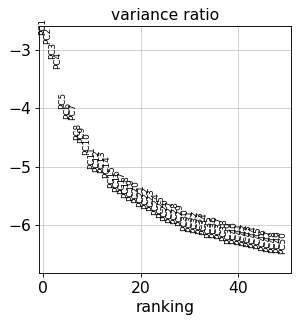

In [10]:
sc.pp.normalize_total(adataT, target_sum=1e4)

sc.pp.log1p(adataT)
#sc.pp.scale(adataT, max_value=10)
sc.tl.pca(adataT, svd_solver='arpack')
sc.pl.pca_variance_ratio(adataT, log=True, n_pcs=50)

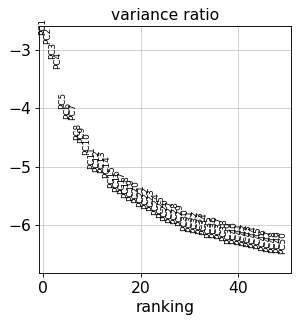

In [11]:
sc.pl.pca_variance_ratio(adataT, log=True, n_pcs=50)

# 